In [1]:
import time
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')

## Univariate linear regression from scratch

Regressors are a group of machine learning algorithms which can predict a **continuous value** from a set of **features** for a given **instance**. 

- Continious value - if the value can be any value (rather than a set of values).
- Feature - a property of something (height, count, colour etc).
- Instance - a single example of something being analysed.

A univariate linear regressor predicts a value of something from a single features and assumes the relationship between the feature and the predicted value is linear. It does this by calculating the gradient and the y-intercept of a line of best fit through a scatter plot of the feature and the value of interest. One can then predict an answer for any value of the feature.

In [2]:
def linear_func(X, th0, th1):
    return (X * th1) + th0

def cost_func(X, y, th0, th1):
    mm = len(X)
    return (1/2*mm) * np.sum((linear_func(X, th0, th1) - y)**2)

def pderiv_th0(X, y, alpha, th0, th1):
    mm = len(X)
    return (1 / mm) * np.sum(linear_func(X, th0, th1) - y)

def pderiv_th1(X, y, alpha, th0, th1):
    mm = len(X)
    return (1 / mm) * np.sum((linear_func(X, th0, th1) - y)*X)

The equation for the line of best fit (our model) is simply $$h_{\theta}(x) = \theta_{1}x + \theta_{0}$$
We start with guesses for the $\theta$ parameters and calculate a random line. This obviously will not be a good fit to the data but we need to quantify this so we can improve upon it. To do this we use the cost function which evaluates the quality of the fit $$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x) - y)^{2}$$
If the fit of the model is perfect, $h_{\theta}(x)$ will be the same as $y$ and so $J(\theta)$ (the cost) will be $0$. Any deviation from this perfect fit will increase the cost as the difference between the calculated and actual y value is squared. If we take the partial derivative of the cost function with respect to each parameter at a time.
$$\frac{\partial J}{\partial \theta_{0}} = \frac{1}{m}\sum_{i=1}^{m}((\theta_{1}x + \theta_{0}) - y)^{2}$$ 
$$\frac{\partial J}{\partial \theta_{1}} = \frac{1}{m}\sum_{i=1}^{m}((\theta_{1}x + \theta_{0}) - y)^{2}x$$
We find the slope of the cost function for any set of values of the parameters. Our aim is to change the parameters to reduce this slope to 0 (the minima) and in so doing, minimize $J(\theta).

theta_0 -  44
theta_1 -  35


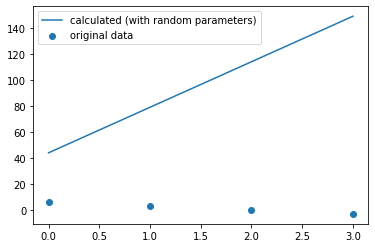

initial cost -  86640.0


In [3]:
# These will be our target values for theta
th0_r = 6
th1_r = -3

# We therefore use our target theta values to calculate y
X = np.array([0,1,2,3])
y = (th1_r*X) + th0_r

# We take random numbers for our two parameters
th0 = np.random.randint(0, 99, 1)[0]#44
th1 = np.random.randint(0, 99, 1)[0]#35
print('theta_0 - ', th0)
print('theta_1 - ', th1)

# And show the resulting plot
plt.plot(X, linear_func(X, th0, th1), label='calculated (with random parameters)')
plt.scatter(X, y, label='original data')
plt.legend()
plt.show()

# The cost is the measure of how inaccurate our line is to our data
print('initial cost - ', cost_func(X, y, th0, th1))

In order to improve on our line parameters, we can take the partial derivative of the cost function and use it to make a new guess for the parameters. 
$$\theta_{0}' = \theta_{0} - \alpha \frac{\partial J}{\partial \theta_{0}}$$
$$\theta_{1}' = \theta_{1} - \alpha \frac{\partial J}{\partial \theta_{1}}$$
The optimization parameter $\alpha$ allows us to control the speed of descent. We then just plug our new values in and repeat the process of optimization untill a satisfactory point is reached. This could be when the partial derivative is 0, when the cost function cannot be reduced significantly further or due to time restraints. We pick the number of loops to get us to this end point.

theta0 -  6.000000000000063
theta1 -  -3.0000000000000293
final cost -  1.1597833028559316e-26


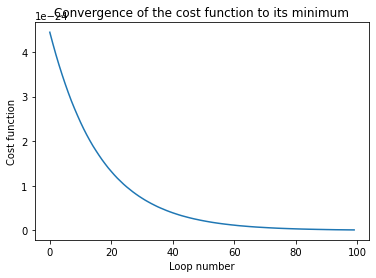

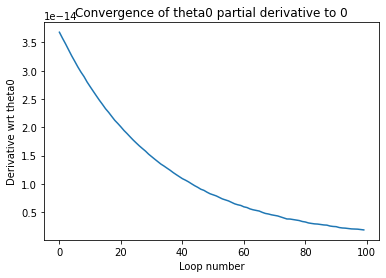

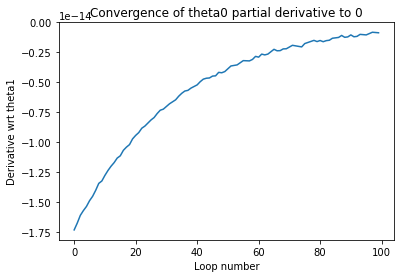

In [14]:
# The parameters for our gradient descent (optimising our line of best fit)
alpha = 0.1
loops = 100

cost_converge = []
part_deriv_0 = []
part_deriv_1 = []

for ii in range(loops):
    # The new values of th0 and th1 are stored in temporary variables so that 
    # each can be calculated with the same original th0 and th1
    temp_th0 = th0 - (alpha * pderiv_th0(X, y, alpha, th0, th1))
    temp_th1 = th1 - (alpha * pderiv_th1(X, y, alpha, th0, th1))
    th0 = temp_th0
    th1 = temp_th1
    cost_converge.append(cost_func(X, y, th0, th1))
    part_deriv_0.append(alpha * pderiv_th0(X, y, alpha, th0, th1))
    part_deriv_1.append(alpha * pderiv_th1(X, y, alpha, th0, th1))

# Our new improved theta values and the subsequent cost using these values
print('theta0 - ', th0)
print('theta1 - ', th1)
print('final cost - ', cost_func(X, y, th0, th1))


plt.plot(cost_converge)
plt.title('Convergence of the cost function to its minimum')
plt.xlabel('Loop number')
plt.ylabel('Cost function')
plt.show()
plt.plot(part_deriv_0)
plt.title('Convergence of theta0 partial derivative to 0')
plt.xlabel('Loop number')
plt.ylabel('Derivative wrt theta0')
plt.show()
plt.plot(part_deriv_1)
plt.title('Convergence of theta1 partial derivative to 0')
plt.xlabel('Loop number')
plt.ylabel('Derivative wrt theta1')
plt.show()

#fix, (ax1, ax2) = plt.subplots(1,2)
#ax1 = plt.plot(part_deriv_0)
#ax2 = plt.plot(part_deriv_1)
#plt.show()

A negative slope of the cost function indicates that the parameter should be increased and vice versa. Therefore we minus the partial derivative from the old value of the parameter. Our final cost is 0 as with this data set we can find a perfect set and the partial derivatives both converge to 0 so we know we have reached a minimum of the cost function.

Pearson R -  (1.0, 0.0)
weight -  -3
calculated weight -  -3.0000000000000293
bias -  6
calculated bias -  6.000000000000063


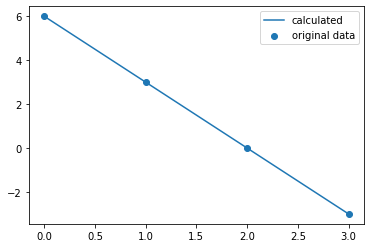

In [15]:
print('Pearson R - ', pearsonr(linear_func(X, th0, th1), y))
print('weight - ', th1_r)
print('calculated weight - ', th1)
print('bias - ', th0_r)
print('calculated bias - ', th0)

plt.plot(X, linear_func(X, th0, th1), label='calculated')
plt.scatter(X, y, label='original data')
plt.legend()
plt.show()

We have accurately determined the target parameters and fit the data. 

## Multivariate linear regression from scratch

We will now try the same with multiple features. This works in essentially the same way, taking each weighting coefficient and updating it from the partial derivative. Again this is all done simultaneously with the bias, and the same parameters are used for each partial derivative.

In [16]:
def linear_func_mv(x, weights, biases):
    return x @ weights.t() + biases

def cost_func_mv(X, y, thi, th0):
    mm = len(X)
    return (1/2*mm) * torch.sum((linear_func_mv(X, thi, th0) - y)**2)

The linear function for this multivariate liner regression simply has more features and a weighting for each one.
$$h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \cdots + \theta_{n}x_{n}$$
We can calculate this as a simple matrix operation

In [17]:
# Setting up the input data
instances = 50
features = 3

# These will be the target parameters and are taken at random
theta0 = np.random.randint(0, 9000, 1)
thetai = np.random.randint(1, 9, features)

df_inputs = pd.DataFrame()
df_targets = pd.DataFrame()
# The target value is created from the input data and the parameters
# This is the bias
df_targets['target'] = [theta0[0]] * instances

for ii in range(features):
    # The input data is created randomly
    df_inputs[str(ii)] = np.random.randint(1,9,instances)
    # And the target is updated with the feature x the theta_parameter
    df_targets['target'] += (df_inputs[str(ii)] * thetai[ii])

# requires .float() to match the weight and bias tensors created below
targets = torch.tensor(df_targets.values).float()
inputs = torch.tensor(df_inputs.values).float()

print(df_inputs.head())
print(df_targets.head())

   0  1  2
0  4  5  1
1  1  1  8
2  5  7  6
3  8  5  1
4  3  2  4
   target
0    6579
1    6559
2    6605
3    6587
4    6562


In [22]:
def mv_linear_regression_alg(inputs, targets, loops, alpha, w_in=None, b_in=None):

    # require_grad = True in order to backwards compute derivatives of
    # the weights and biases
    # number of weight coefficients equal to the number of features
    w = torch.randn(1, inputs.shape[1], requires_grad=True)
    b = torch.randn(1, requires_grad=True)

    # This gives the option of inputting guesses (or precalculated) values for 
    # weights and biases
    if w_in is not None:
        w == w_in
    if b_in is not None:
        b == b_in
    
    # Provide an initial cost using the initial parameters and the cost function
    print('initial cost - ', cost_func_mv(inputs, targets, w, b))
    print('Improving parameters...')
    
    t_mv1 = time.time()
    for i in range(loops):
        cost = cost_func_mv(inputs, targets, w, b)
        # This calculates the partial derivatives for all parameters
        cost.backward()
        # stop autograd from tracking history on Tensors
        with torch.no_grad():
            w -= w.grad * alpha
            b -= b.grad * alpha
            w.grad.zero_()
            b.grad.zero_()
    t_mv2 = time.time()

    print(f'...time taken is {t_mv2 - t_mv1} s to complete {loops_mv} loops')
    print('final cost - ', cost_func_mv(inputs, targets, w, b))
    
    return w, b

alpha_mv = 1e-5
loops_mv = 10000
#w, b = mv_linear_regression_alg(inputs, targets, w, b, loops_mv, alpha_mv)
w, b = mv_linear_regression_alg(inputs, targets, loops_mv, alpha_mv)

initial cost -  tensor(5.4138e+10, grad_fn=<MulBackward0>)
Improving parameters...
...time taken is 1.5193428993225098 s to complete 10000 loops
final cost -  tensor(1.2988, grad_fn=<MulBackward0>)



RESULTS

Pearson R -  0.9999994938116612
weights -  [2 7 2]
calculated weights -  tensor([[2.0071, 7.0065, 2.0095]], requires_grad=True)
bias -  [6534]
calculated bias -  tensor([6533.8882], requires_grad=True)


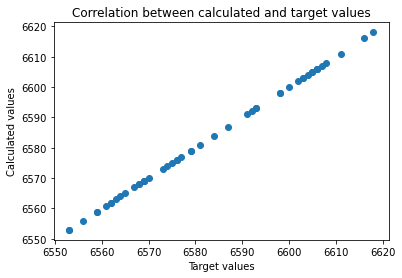

In [23]:
print('\nRESULTS\n')
calc_targets = linear_func_mv(inputs, w, b).t()
df_targets['results'] = calc_targets[0].detach().numpy()
print('Pearson R - ', df_targets['target'].corr(df_targets['results']))
print('weights - ', thetai)
print('calculated weights - ', w)
print('bias - ', theta0)
print('calculated bias - ', b)

plt.scatter(df_targets['target'].values, df_targets['results'].values)
plt.title('Correlation between calculated and target values')
plt.xlabel('Target values')
plt.ylabel('Calculated values')
plt.show()